# **Course: Data Science for Decision Support**
**Assignment 1.2** (Submission deadline 1.06.2022, 16:00), 

**Author:** Firstname, Lastname: Matriculation Nr.


---




# Problem: **Calssification** (Total score 32)

# **`Task 1 „Data Pre-processing“ (7 Scores)`**

1)	Read the data from your individual variant into Python notebook

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,precision_recall_curve,recall_score,precision_score,f1_score
from sklearn import metrics,tree,neighbors
from sklearn.svm import SVC
url = 'https://raw.githubusercontent.com/Faateih/data-science/main/titanic_full%20(1).csv'
df = pd.read_csv(url)
print(df)


      PassengerId  Survived  Pclass  \
0               1       0.0       3   
1               2       1.0       1   
2               3       1.0       3   
3               4       1.0       1   
4               5       0.0       3   
...           ...       ...     ...   
1304         1305       NaN       3   
1305         1306       NaN       1   
1306         1307       NaN       3   
1307         1308       NaN       3   
1308         1309       NaN       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                

In [ ]:
#add more cell if needed to each code cell

2) Output the main information (number of variables, number of instances). 

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Age_wiki     1302 non-null   float64
 15  Hometown     1304 non-null   object 
 16  Boarded      1304 non-null   object 
 17  Destination  1304 non-null   object 
 18  Lifeboat     502 non-null    object 
 19  Body  

*Comment the results of the previous program*

3) Output some first rows of the dataset. 


In [110]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


4) Make explanatory data analyses for each variable (mean, std, etc.).

In [111]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,WikiId,Age_wiki,Class
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1304.000000,1302.000000,1304.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,658.534509,29.415829,2.291411
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,380.377373,13.758954,0.840852
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000,0.170000,1.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,326.750000,21.000000,1.750000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,661.500000,28.000000,3.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,987.250000,37.750000,3.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1314.000000,74.000000,3.000000


*Comment the results of the previous program* 

5) Look at independent and dependent variables. Divide the dataset accordingly into matrices X and Y. Output the shapes of these matrices. 

In [112]:
df.drop(['Name_wiki'],axis=1)
df["Cabin"].replace({"male": "1", "female": "0"}, inplace=True)
X=df[['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked','WikiId','Age_wiki','Hometown','Boarded','Destination','Lifeboat','Body','Class']]
Y=df[['Survived']]
print("Y Shape :",np.shape(Y), " X Shape :",np.shape(X))

Y Shape : (1309, 1)  X Shape : (1309, 16)


*Comment the results of the previous program* 

6) Look at data types of the variables. Are there any categorical variable you need to encode? Execute necessary transformations. Drop some columns if necessary, when recommended in your individual variant.

In [113]:
print("X Types: \n",X.dtypes)
print("Y Types: \n",Y.dtypes) 

X Types: 
 Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked        object
WikiId         float64
Age_wiki       float64
Hometown        object
Boarded         object
Destination     object
Lifeboat        object
Body            object
Class          float64
dtype: object
Y Types: 
 Survived    float64
dtype: object


7) Are there any Nan values? Try different filling of them (mean, median).

In [114]:
df.isnull().sum()
df['Survived'] = df['Survived'].fillna(df['Survived'].mean())
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
df["Cabin"].replace({"True": "1", "False": "0"}, inplace=True)
df['Cabin'] = df['Cabin'].fillna(0)
df['Age'] = df['Age'].fillna(df['Age'].mean())
df["Cabin"].replace({"S": "1", "C": "0"}, inplace=True)
df['Embarked'] = df['Embarked'].fillna(0)
df['WikiId'] = df['WikiId'].fillna(df['WikiId'].mean())
df.drop(['Name_wiki'], axis=1)
df['Age_wiki'] = df['Age_wiki'].fillna(df['Age_wiki'].mean())
df['Hometown'] = df['Hometown'].fillna(df['Hometown'].mode())
df['Boarded '] = df['Boarded'].fillna(df['Boarded'].mode())
df['Destination'] = df['Destination'].fillna(df['Destination'].mode())
df['Lifeboat'] = df['Lifeboat'].fillna(df['Lifeboat'].mode())
df['Body'] = df['Body'].fillna(df['Body'].mode())
df['Class'] = df['Class'].fillna(df['Class'].mean())



df.isnull().sum()


PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin             0
Embarked          0
WikiId            0
Name_wiki         5
Age_wiki          0
Hometown          5
Boarded           5
Destination       5
Lifeboat        806
Body           1065
Class             0
Boarded           5
dtype: int64

*Comment the results of the previous program* 

8) Check the dependences between each of the independent variable and the target variable and among the independent variables.  Output correlation table and corresponding headmap results.

In [115]:
df[df.columns[2:]].corr().style.background_gradient(cmap='Greens')

,Pclass,Age,SibSp,Parch,Fare,WikiId,Age_wiki,Class
Pclass,1.000000,-0.366371,0.060832,0.018322,-0.558477,0.894101,-0.419747,0.994660
Age,-0.366371,1.000000,-0.190747,-0.130872,0.171521,-0.297164,0.901933,-0.364586
SibSp,0.060832,-0.190747,1.000000,0.373587,0.160224,0.064043,-0.248573,0.062092
Parch,0.018322,-0.130872,0.373587,1.000000,0.221522,0.000668,-0.122741,0.020000
Fare,-0.558477,0.171521,0.160224,0.221522,1.000000,-0.473513,0.186320,-0.549398
WikiId,0.894101,-0.297164,0.064043,0.000668,-0.473513,1.000000,-0.348716,0.899477
Age_wiki,-0.419747,0.901933,-0.248573,-0.122741,0.186320,-0.348716,1.000000,-0.417643
Class,0.994660,-0.364586,0.062092,0.020000,-0.549398,0.899477,-0.417643,1.000000


*Comment the results of the previous program* 

9) Build 2D plots of dependences between each pair of the variables.

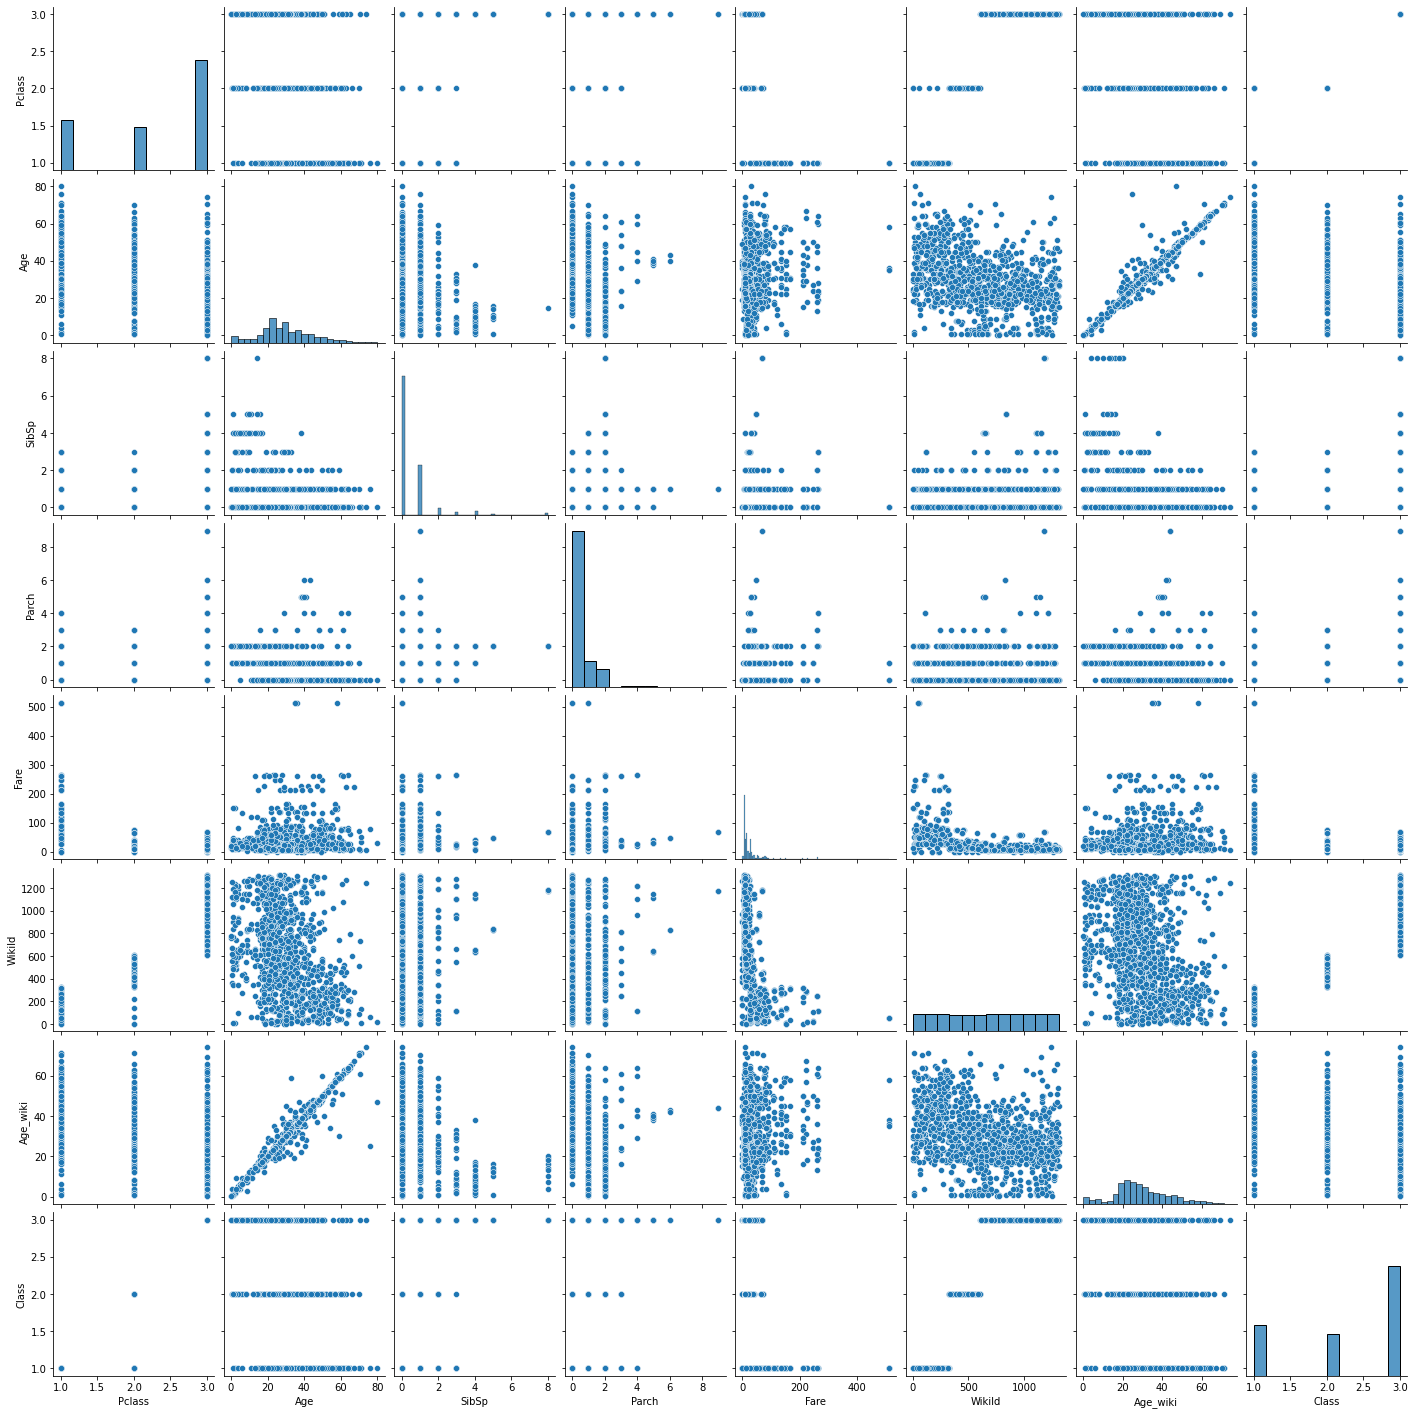

In [116]:
sns.pairplot(X)

*Comment the results of the previous program* 

# **`Task 2 “Data Analysis” (7 Scores)`**

Compare 4 ML methods: 

*   Logistic regression
*   Decision tree classification
*   KNN: k nearest neighbours classification
*   Support vector machine (SVM) classification



1) Scale your whole dataset. Try different scalings for your dataset. (Standard Scaler, MinMax Scaler). Experiment with Standard Scaler first.

In [117]:
# create Standard scaler
scaler = StandardScaler()
scaler.fit(X)
normalized_X = scaler.transform(X)


# create min max scaler
scaler = MinMaxScaler()
scaler.fit(X)
min_max_normalized_X = scaler.transform(X)

ValueError: ignored

2) Divide your dataset into 2 parts: training set and testing set (90:10). Use defined random_state to reproduce the splitting for other Scaler. Output the dimension of the resulting datasets.

In [ ]:
#Write your code here 

3) **Preliminary analysis:** Build 4 models based on 4 mentioned ML methods. For each model: train with training set and output the confusion matrix of the model using training set. Calculate accuracy, precision, recall, F1 metrics over training set. Is precision or recall more important for description of your data? Build the ROC_AUC curve. Test your models with a testset and output the confusion matrix. Compare the same performance metrics calculated inside one model for training and testing sets.

**Linear logistic regression**

In [ ]:
#Write your code here 

*Comment the results of the previous program*. *Compare the results of the same characteristics for training and test sets. Make conclusions.*

**Decision tree classification**

In [ ]:
#Write your code here 

*Comment the results of the previous program*. *Compare the results of the same characteristics for training and test sets. Make conclusions.*

**kNN: k nearest neighbours classification**

In [ ]:
#Write your code here 

*Comment the results of the previous program*. *Compare the results of the same characteristics for training and test sets. Make conclusions.*

**Support vector machine**

In [ ]:
#Write your code here 

*Comment the results of the previous program*. *Compare the results of the same characteristics for training and test sets. Make conclusions.*

4) Re-calculate the results of Task 2 (use the same random_state as for Standard Scaler by splitting) with MinMaxScaler and compare the results based on metric accuracy. Use the Scaler, which gives the best results for the next Tasks.

In [ ]:
#Write your code here

*Comment the results of the previous program.*

# **`Task 3 “Cross validation” (10 Scores)`**

1)	Make 5 fold cross validation, dividing your combined (training + validation sets) into 5 folds in different combinations manually with the function train_test_split() and  without using such functions as: cross_val_score(), cross_validation(), GridSearchCV(). Execute a cycle for each fold running all four models inside.

2) Find the average values for each metric for each model based on the validation set. 

3) Try different values for the hyperparameters (see corresponding lecture slides) for each model and re-run the steps 1-2. Make conclusions about the best model and best parameters, based on each metrics and based on the majority of the metrics. 



In [ ]:
#Write your code here

*Show the results of 3 runs of each model with different hyperparameters each.*

4)	**Final evaluation.** Evaluate your model using a test set (remains the same from the previous task) based on all metrics. Take the best hyperparameters of the models from the cross validation step and train the model with the complete training set (training set + validation set). Compare the results obtained on the validation set. Make the conclusions about the results.

In [ ]:
# Write your code here

# **`Task 4 “Use automatic cross validation ” (10 Scores)`**

1) Use the functions cross_val_score() or cross_validation() for automation of the manually performed process in Task 3. Use the best hyperparameter values for each model found at the previous step.

In [ ]:
#Write your code here for Logistic regression

In [ ]:
#Write your code here for Decision tree classification

In [ ]:
#Write your code here for #kNN: k nearest neighbours classification

In [ ]:
#Support vector machine classification

*!! Comment the obtained results here !!*

2) Use the function GridSearchCV() to find the best hyperparameters for each ML method.

In [ ]:
#Write your code here for Logistic regression

In [ ]:
#Write your code here for Decision tree classification

In [ ]:
#Write your code here for #kNN: k nearest neighbours classification

In [ ]:
#Write your code here for Support vector machine classification

*!! Comment the obtained results here !!*

3) Evaluate the found models and parameters with the test dataset. Compare the results of Tasks 3 and Task4. Make conclusion about the results.

In [ ]:
#Write your code here Logistic regression

In [ ]:
#Write your code here for Decision tree classification

In [ ]:
#Write your code here for #kNN: k nearest neighbours classification

In [ ]:
#Write your code here for Support vector machine classification

*!! Comment the obtained results here !!*

4) Output residuals/outliers (wrongly classified observations) for each model. Are there any observation, which were wrongly classified by all models?  

In [ ]:
#Write your code here to output the outliers for all four models as a DataFrame.

5) Try to exclude these observations (1-3 observations) and rebuild the models. Compare the accuracy result before and after removing of outliers (use cross_validation() function) andrun all 4 models with the reduced dataset without outliers once more. 

In [ ]:
#Write your code here for #Logistic model after removing of outliers

In [ ]:
#Write your code here for Decision tree classification after removing of outliers

In [ ]:
#Write your code here for kNN: k nearest neighbours classification after removing of outliers

In [ ]:
#Write your code here for Support vector machine classification after removing of outliers

!! Make conclusions as a Text field !!